In [4]:
green

Traceback (most recent call last):
  File "C:\Program Files (x86)\Qudi\logic\jupyterkernel\qzmqkernel.py", line 795, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-4b5f940728b2>", line 1, in <module>
    green
NameError: name 'green' is not defined


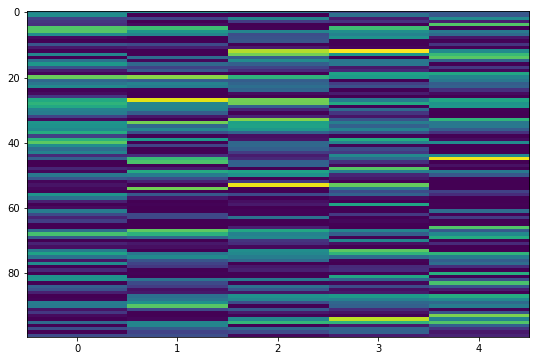

In [12]:

plt.imshow(data,interpolation='nearest', aspect='auto')
plt.show()

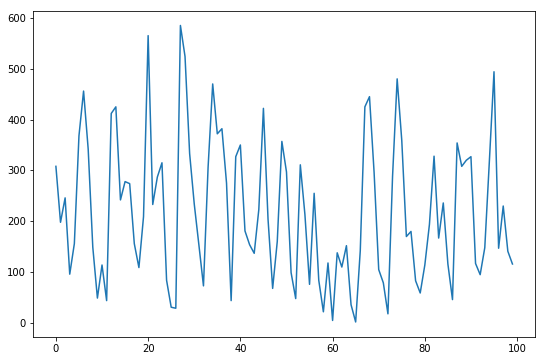

In [13]:
plt.plot(y)
plt.show()

In [69]:
from collections import OrderedDict
import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import traceback
from core.module import Connector, StatusVar
from core.util.mutex import Mutex
from logic.generic_logic import GenericLogic
from qtpy import QtCore
from PyDAQmx import Task

import PyDAQmx
import datetime


In [5]:
# import telegram
# bot = telegram.Bot(token='968560013:AAGSzyvq3SEnHpo-o4WPeXM8_sywoKDYZH0')
# # bot = telegram.Bot(token='TOKEN')

# print(bot.get_me())
# chat_id = bot.get_updates()[-1].message.chat_id
# chat_id
# bot.sendMessage(chat_id=chat_id, text="Hi.")

In [6]:
""" Simple example of digital output

    This example outputs the values of data on line 0 to 7
"""

off = np.array([0,0,0,0,0,0,0,0], dtype=np.uint8)
green = np.array([0,1,0,0,0,0,0,0], dtype=np.uint8)
greenAOM = np.array([0,1,1,0,0,0,0,0], dtype=np.uint8)
redAOM = np.array([0,0,0,1,0,0,0,0], dtype=np.uint8)
everything = greenAOM + redAOM

task = Task()
task.CreateDOChan("/Dev4/port1/line0:7","",PyDAQmx.DAQmx_Val_ChanForAllLines)


In [7]:
task.StopTask()

In [8]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
task.StopTask()

In [7]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
task.StopTask()

In [9]:
def init_scanner(v_min=None, v_max=None, speed = None):
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
    task.StopTask()

    time.sleep(0.1)


    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
    task.StopTask()

    if speed is not None:
        laserscannerlogic.set_scan_speed(speed)    
    else:
        laserscannerlogic.set_scan_speed(0.1)

    try:
        if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
            laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
            time.sleep(0.5)
            laserscannerlogic._pulse_generator_device.pulser_on()
            laserscannerlogic.odmrlogic().mw_cw_on()
        else:
            laserscannerlogic.log.error('load PLE sequence on AWG')
            laserscannerlogic._pulse_generator_device.pulser_off()
            laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
            laserscannerlogic.odmrlogic().mw_off()
            laserscannerlogic.stop_scanning()

    #         return -1

        laserscannerlogic.current_position = laserscannerlogic._scanning_device.get_scanner_position()


        if v_min is not None:
            laserscannerlogic.scan_range[0] = v_min
        else:
            v_min = laserscannerlogic.scan_range[0]
        if v_max is not None:
            laserscannerlogic.scan_range[1] = v_max
        else:
            v_max = laserscannerlogic.scan_range[1]

        laserscannerlogic._scan_counter_up = 0
        laserscannerlogic._scan_counter_down = 0
        laserscannerlogic.upwards_scan = True

        # TODO: Generate Ramps
        laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(v_min, v_max, laserscannerlogic._scan_speed)


        laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(v_max, v_min, laserscannerlogic._scan_speed)

        laserscannerlogic._initialise_data_matrix(len(laserscannerlogic._upwards_ramp))

        # Lock and set up scanner
        returnvalue = laserscannerlogic._initialise_scanner()
        if returnvalue < 0:
            print('error in scanner init')
            # TODO: error message
    #         return -1
    #     laserscannerlogic.sigScanNextLine.emit()
        laserscannerlogic.sigScanStarted.emit()


    #     return 0

    except Exception as e:
        laserscannerlogic.log.error('The scan went wrong, killing the scanner.')
        laserscannerlogic.stop_scanning()
        raise e

def kill_scanner():
    laserscannerlogic.stop_scanning()
    laserscannerlogic._close_scanner()

In [9]:
# laserscannerlogic.odmrlogic().cw_mw_power = -15
# laserscannerlogic.odmrlogic().cw_mw_frequency = 2896360
# laserscannerlogic._clock_frequency
laserscannerlogic.odmrlogic().cw_mw_frequency

2877000000.0

In [10]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
task.StopTask()


In [10]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
task.StopTask()

In [11]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,off,None,None)
task.StopTask()


In [65]:
kill_scanner()

In [66]:
v0= -1.5
v1= -0.5
# laserscannerlogic.set_clock_frequency(150)
init_scanner(v_min = v0,v_max = v1,speed= 0.05)


In [67]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
task.StopTask()

time.sleep(0.01)

task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
task.StopTask()

counts = laserscannerlogic._do_next_one_line()


In [68]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()
# print(max(counts)/np.average(counts))

In [70]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()
# print(max(counts)/np.average(counts))

In [73]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
# print(max(counts)/np.average(counts))

In [72]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
# print(max(counts)/np.average(counts))

48.5663082437276


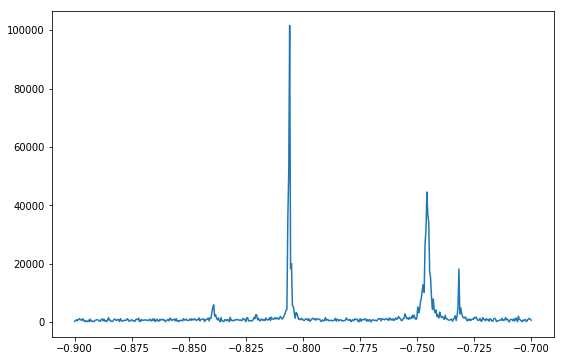

In [43]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
print(max(counts)/np.average(counts))

50.04170141784821


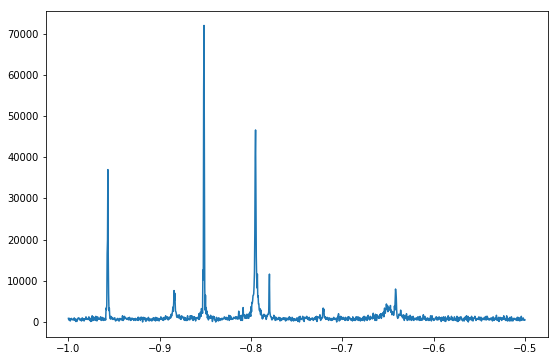

In [38]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
print(max(counts)/np.average(counts))

In [56]:
laserscannerlogic._goto_speed = 1.0
laserscannerlogic._goto_during_scan(-0.70)

0

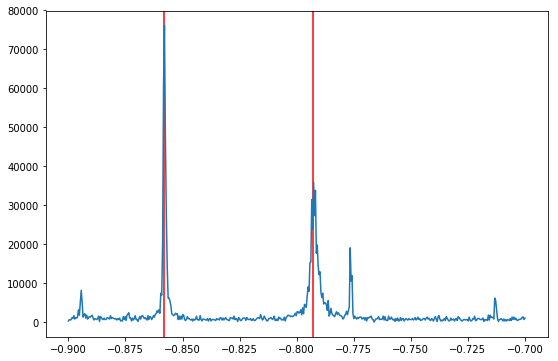

In [68]:
plt.axvline(x=-0.858,color= 'red')

plt.axvline(x=-0.793,color= 'red')
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
# print(max(counts)/np.average(counts))

In [70]:
0.065/0.2 *7.2

2.3400000000000003

134.07590759075907


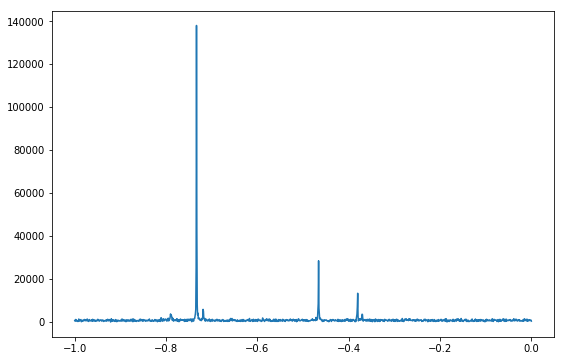

In [8]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
print(max(counts)/np.average(counts))

In [18]:
laserscannerlogic._goto_speed = 1.0
laserscannerlogic._goto_during_scan(-0.70)

0

4.448398576512456


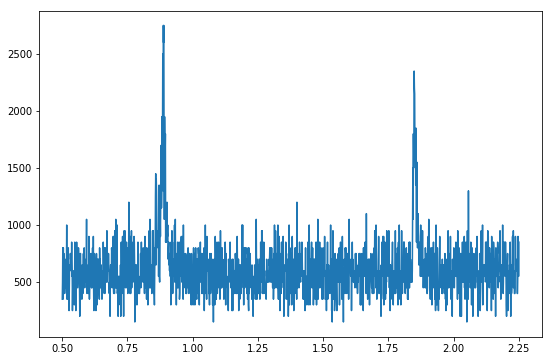

In [314]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
print(max(counts)/np.average(counts))

13.039048719664255


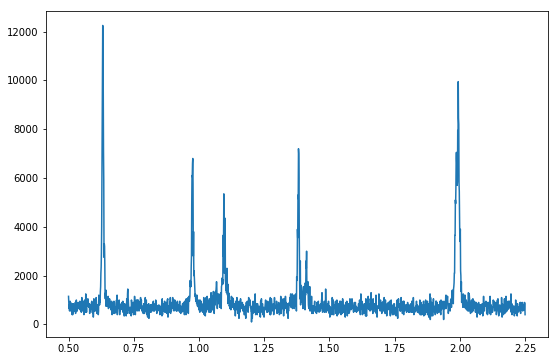

In [311]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
print(max(counts)/np.average(counts))

4.448398576512456


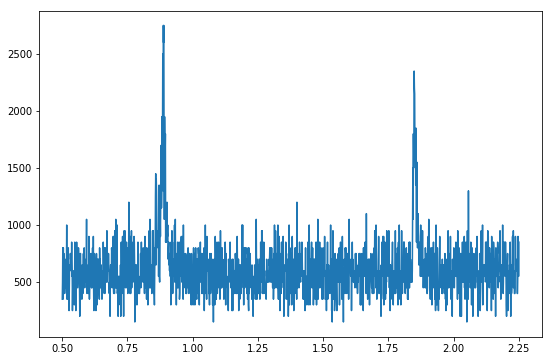

In [317]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
print(max(counts)/np.average(counts))

In [213]:
laserscannerlogic._goto_speed = 1.0
laserscannerlogic._goto_during_scan(0.52)


0

In [170]:
laserscannerlogic._goto_speed = 0.1

0.05

6.348254444206468


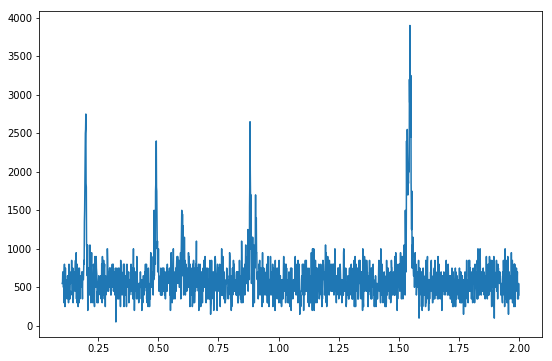

In [229]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
print(max(counts)/np.average(counts))

8.20915879564906


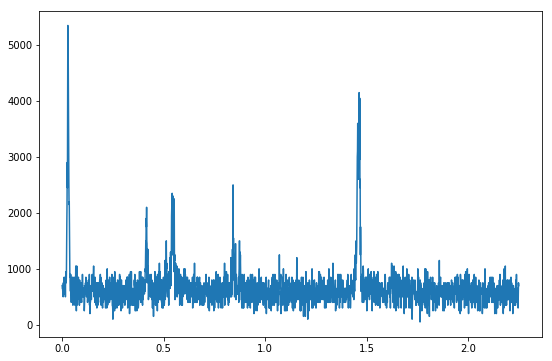

In [44]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
print(max(counts)/np.average(counts))

4.041844983357109


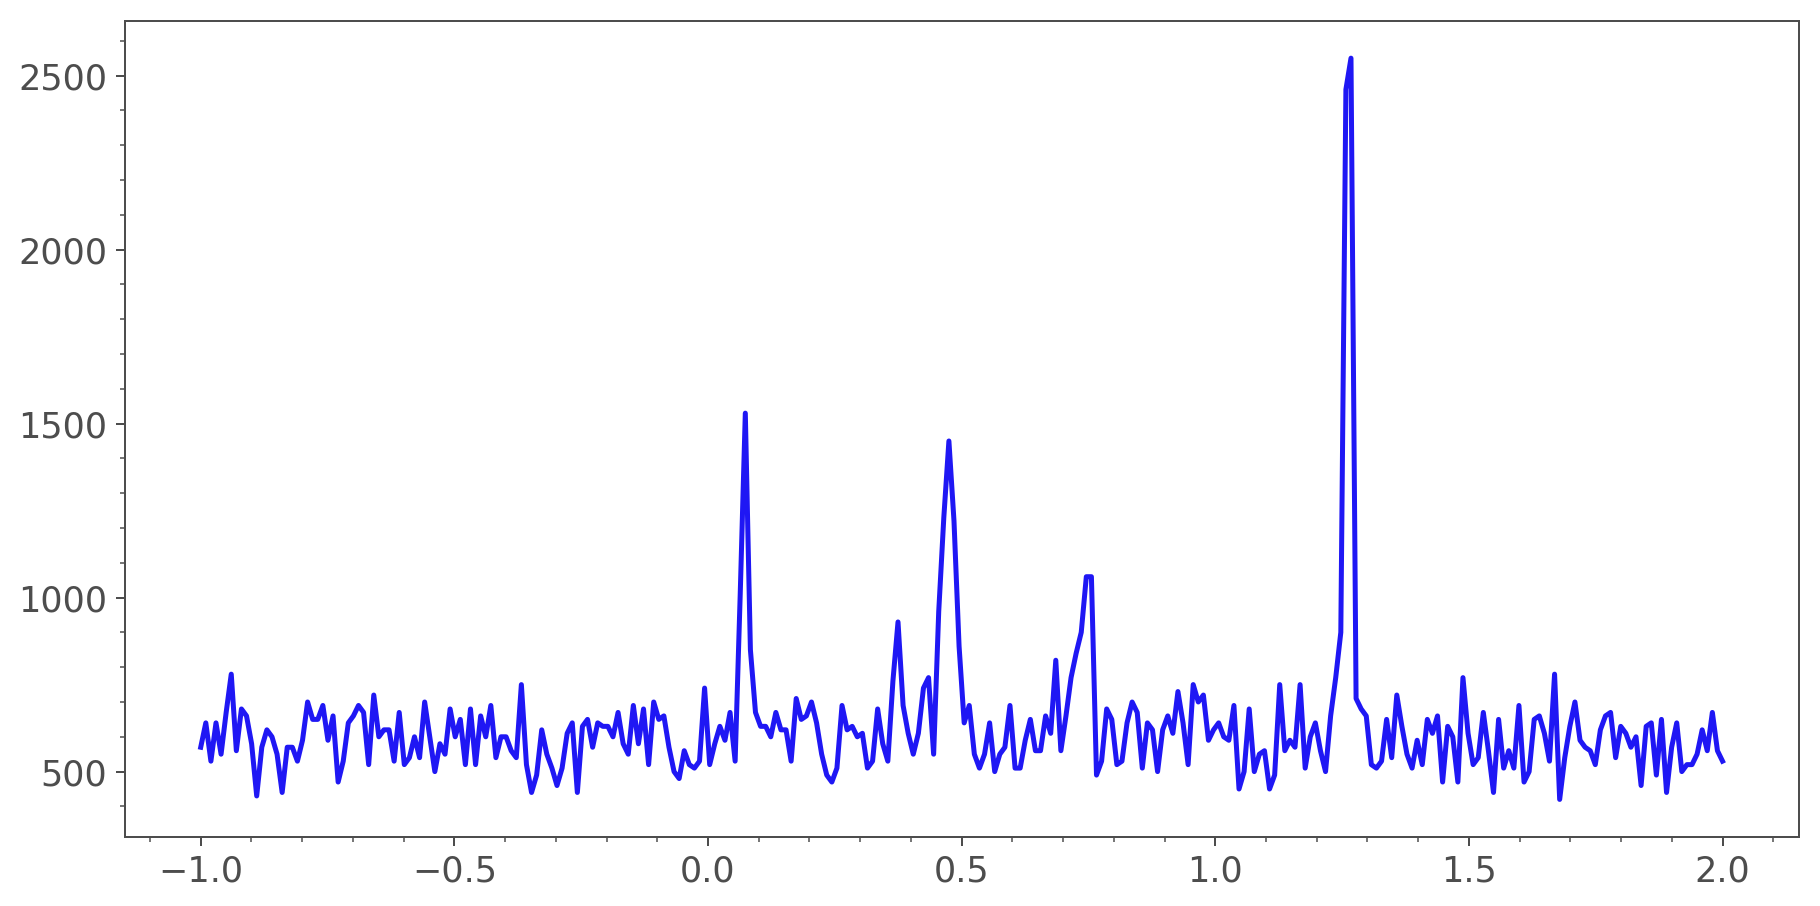

In [213]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
print(max(counts)/np.average(counts))

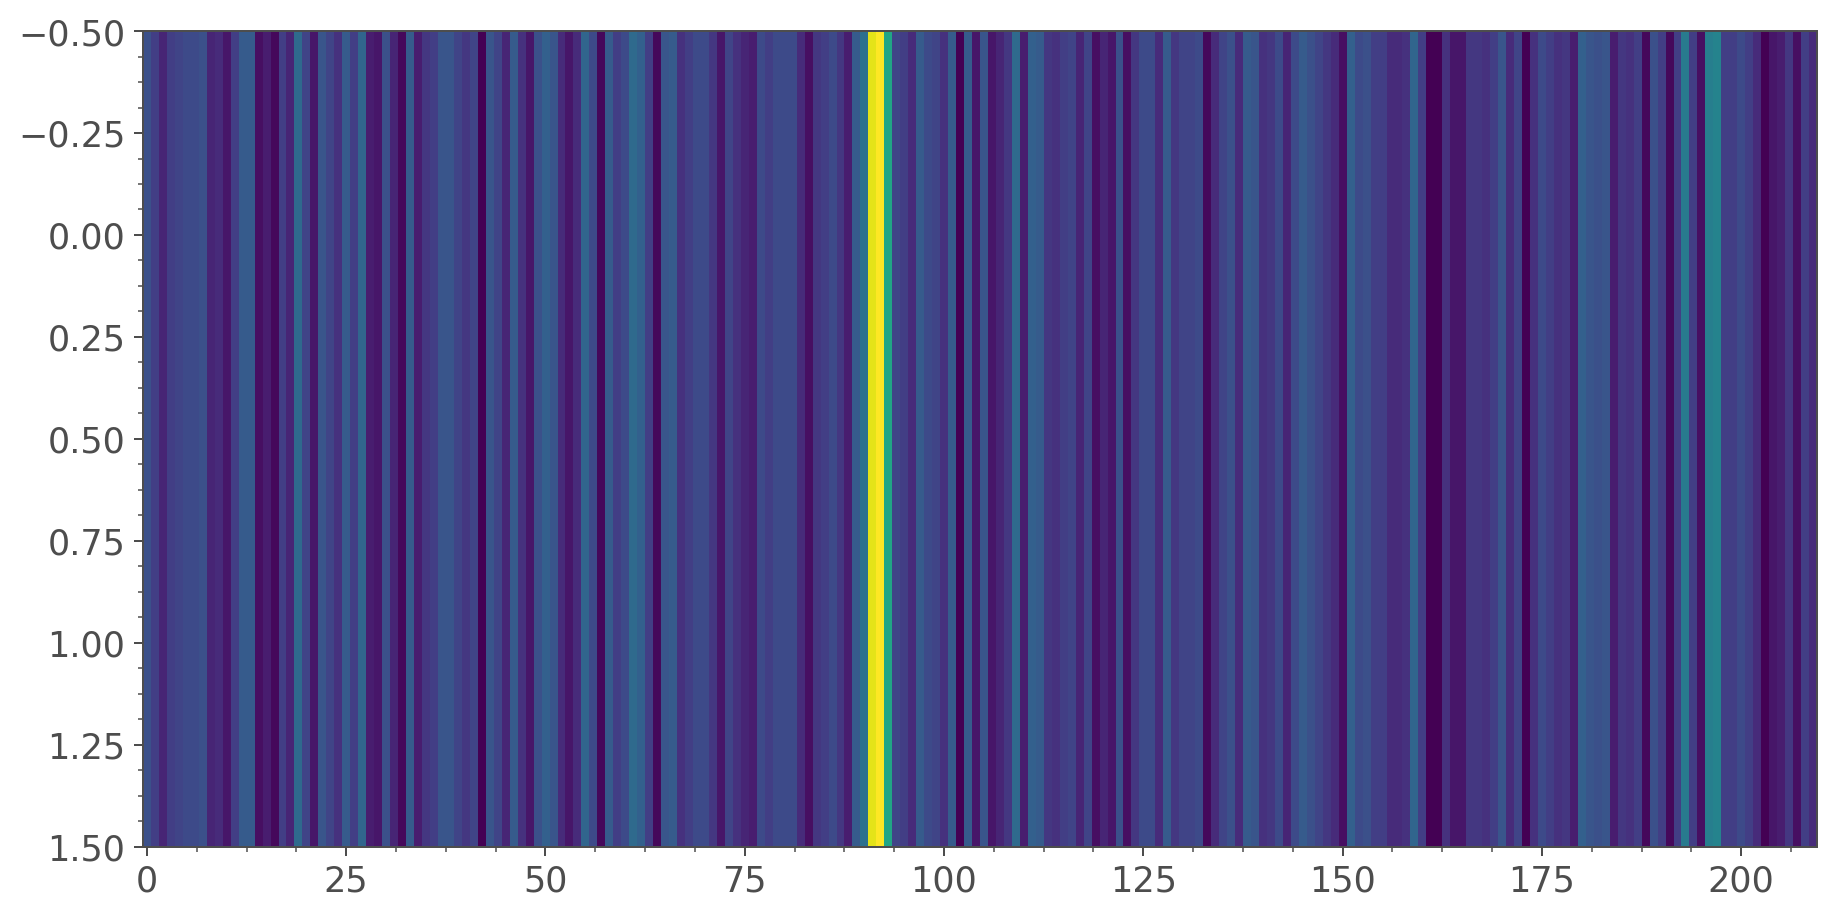

In [230]:
plt.imshow([counts,counts],interpolation='nearest', aspect='auto')
plt.show()
# [counts,counts]

3.1271244051665534


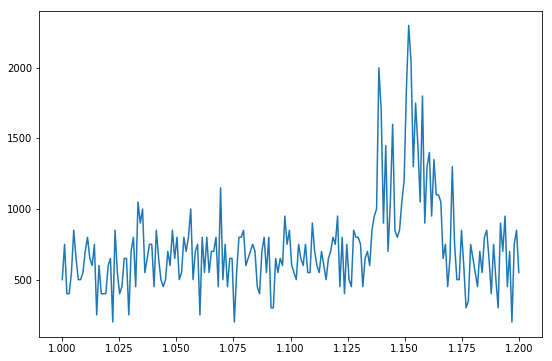

In [21]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
print(max(counts)/np.average(counts))

3.467240554758489


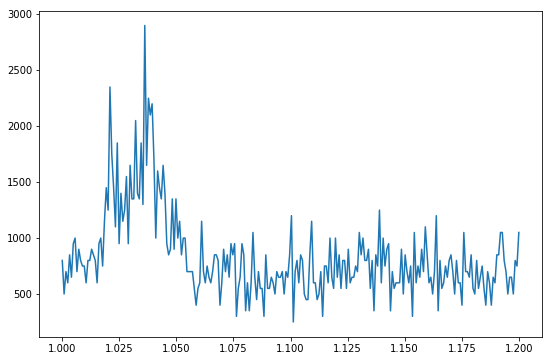

In [53]:
plt.plot(np.linspace(v0,v1,len(scan_counts[-1])),scan_counts[-1],'-')
plt.savefig('test.png')
plt.show()

print(max(scan_counts[-1])/np.average(scan_counts[-1]))

In [380]:
laserscannerlogic.number_of_repeats = 1000
laserscannerlogic.number_of_repeats

1000

In [80]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
task.StopTask()

In [30]:
kill_scanner()


In [22]:
_v_min = 0.9
_v_max = 1.35
laserscannerlogic.set_clock_frequency(50)

speed = 0.05

init_scanner(v_min = _v_min,v_max = _v_max,speed= speed)

task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
task.StopTask()
time.sleep(1)
# task.StartTask()
# task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
# task.StopTask()

# NEED TO CREATE 2 RAMPS FOR FULL SCAN and FOR RESONANCE PHOTON COUNTING

upwards_ramp = laserscannerlogic._generate_ramp(_v_min, _v_max, speed)
downwards_ramp = laserscannerlogic._generate_ramp(_v_max, _v_min, speed)

# laserscannerlogic._upwards_ramp = upwards_ramp
# laserscannerlogic._downwards_ramp = downwards_ramp


ssr = []
scan_counts=[]
counts = []
isStop = False

def singleshot():
    global counts
    
    resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
    laserscannerlogic._goto_during_scan(resonance)
    laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(resonance, resonance, laserscannerlogic._scan_speed)
    laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(resonance, resonance, laserscannerlogic._scan_speed)
        
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
    task.StopTask()

    counts =  laserscannerlogic._do_next_one_line()
#     print('resonance ', resonance)

    if counts is None:
#         print('resonance counts None ', resonance)
#         print('laserscannerlogic._upwards_ramp ',laserscannerlogic._upwards_ramp )
#         print(' laserscannerlogic._downwards_ramp ', laserscannerlogic._downwards_ramp)
        print('COUNTS are NONE in single shot!!!')
    else:
        ssr.append(counts)
    
    
def scan():
    try:
        global counts,upwards_ramp,downwards_ramp

        laserscannerlogic._upwards_ramp = upwards_ramp
        laserscannerlogic._downwards_ramp = downwards_ramp
        
        task.StartTask()
        task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
        task.StopTask()
        time.sleep(0.001)
        
        index = 0
        for j in range(10):
#         while(True):
            index+=1
#             print('j: ',j)
            task.StartTask()
            task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
            task.StopTask()

            counts =  laserscannerlogic._do_next_one_line()
            if counts is None:
                print('COUNTS are NONE in scan!!!')
    
#     MAYBE NAKE SENCE TO CHECK COUNTER STATE AND CLOCKS STATE

                break;
            else:
                scan_counts.append(counts)
                if max(counts)<2.5*np.average(counts):
                    task.StartTask()
                    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
                    task.StopTask()
                    time.sleep(0.001)
                else:
                    break;
        if index ==10:
            isStop  = True
        
    except Exception as e:
        print('exception!')
        print('counts ',counts)
        print('laserscannerlogic._upwards_ramp ',laserscannerlogic._upwards_ramp )
        print('laserscannerlogic._downwards_ramp ',laserscannerlogic._downwards_ramp )
                    
              
for i in range(1000):
#     print('i: ',i)
    if isStop:
        break;
    else:
        scan()
        singleshot()



COUNTS are NONE in scan!!!


Traceback (most recent call last):
  File "C:\Program Files (x86)\Qudi\logic\jupyterkernel\qzmqkernel.py", line 795, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-9782c67b82a8>", line 108, in <module>
    singleshot()
  File "<ipython-input-22-9782c67b82a8>", line 34, in singleshot
    resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
TypeError: object of type 'NoneType' has no len()


882

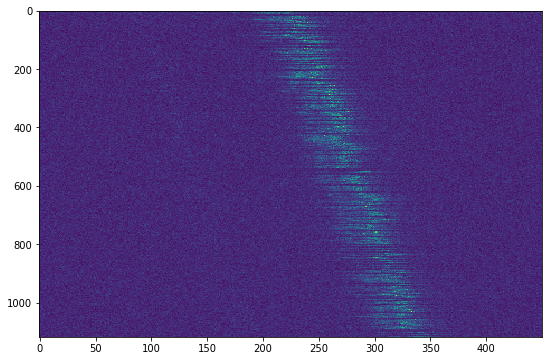

In [28]:
# scan_counts
plt.imshow(scan_counts,interpolation='nearest', aspect='auto')
plt.savefig('onelinesingeshotreadout.png')
plt.show()

# f = open('test1.png', 'rb')
# bot.send_photo(chat_id=chat_id,photo =f )
# f.close()

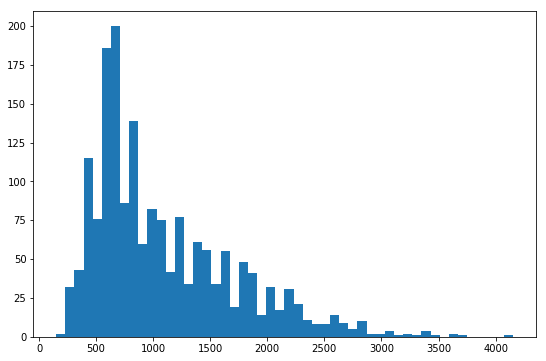

In [29]:
# ssr
plt.hist(np.array(ssr).flatten(),bins = 50)
plt.show()

In [25]:
print('Started: 20 Sept 2019 20:28 ')
import datetime
print('Finished: ')
print(datetime.datetime.now())

Started: 20 Sept 2019 20:28 
Finished: 
2019-09-21 02:34:19.724343


In [26]:
kill_scanner()


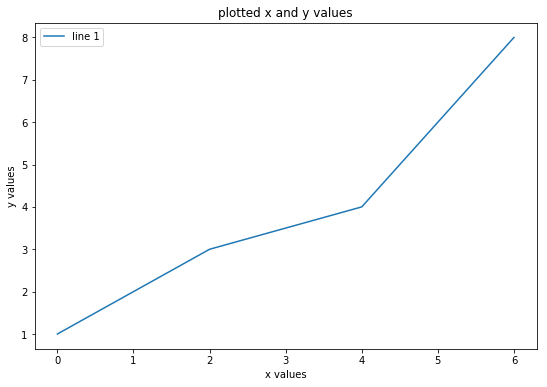

In [22]:
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:

x = [0, 2, 4, 6]
y = [1, 3, 4, 8]


plt.plot(x,y)


plt.xlabel('x values')
plt.ylabel('y values')
plt.title('plotted x and y values')
plt.legend(['line 1'])


# save the figure
plt.savefig('plot.png', dpi=300, bbox_inches='tight')


plt.show()

In [23]:
photo = 'plot.png'
bot.send_photo(chat_id=chat_id,photo = photo )



Traceback (most recent call last):
  File "C:\Program Files (x86)\Qudi\logic\jupyterkernel\qzmqkernel.py", line 795, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-23-d8a5b5a98e56>", line 2, in <module>
    bot.send_photo(chat_id=chat_id,photo = photo )
  File "C:\Program Files (x86)\Anaconda\envs\qudi\lib\site-packages\telegram\bot.py", line 66, in decorator
    result = func(self, *args, **kwargs)
  File "C:\Program Files (x86)\Anaconda\envs\qudi\lib\site-packages\telegram\bot.py", line 407, in send_photo
    **kwargs)
  File "C:\Program Files (x86)\Anaconda\envs\qudi\lib\site-packages\telegram\bot.py", line 123, in _message
    result = self._request.post(url, data, timeout=timeout)
  File "C:\Program Files (x86)\Anaconda\envs\qudi\lib\site-packages\telegram\utils\request.py", line 327, in post
    **urlopen_kwargs)
  File "C:\Program Files (x86)\Anaconda\envs\qudi\lib\site-packages\telegram\utils\request.py", line 238, in _request_wrapper
 

In [354]:
ssr

[array([3000., 3050.]), array([2100., 1050.]), array([1050., 1800.]), array([2200., 1450.]), array([1700., 1300.]), array([1150., 1000.]), array([2550., 2500.]), array([1750.,  550.]), array([2400., 2050.]), array([1650., 1250.])]

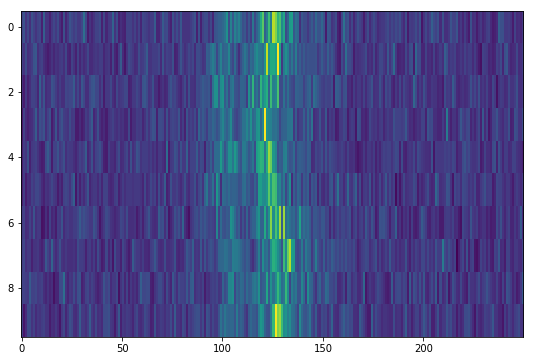

In [355]:
# scan_counts
plt.imshow(scan_counts,interpolation='nearest', aspect='auto')
plt.show()

In [35]:
np.average(scan_counts[0])
max(scan_counts[0])

2400.0

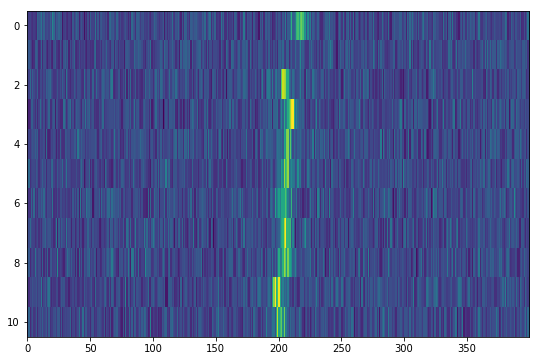

In [68]:
# scan_counts
plt.imshow(scan_counts,interpolation='nearest', aspect='auto')
plt.show()

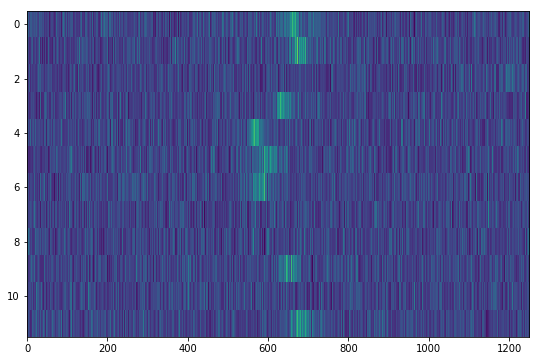

In [16]:
plt.imshow(scan_counts,interpolation='nearest', aspect='auto')
plt.show()

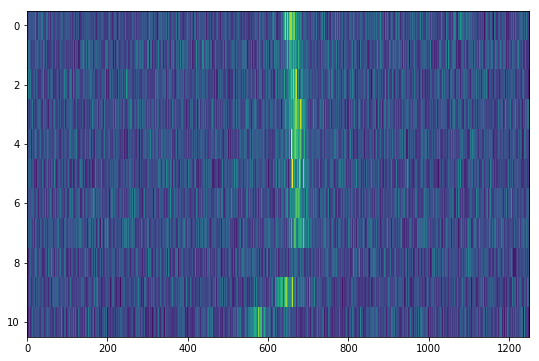

In [55]:

plt.imshow(scan_counts,interpolation='nearest', aspect='auto')
plt.show()

In [396]:
np.array(ssr).flatten()

array([1950., 1950., 1600., 1100., 1550., 1100., 1500.,  700., 3550.,
       1800., 2050., 2500., 1350.,  800., 1050., 1400., 1850., 1900.,
       1350., 1450., 2300., 1900., 2350., 2100., 2000.,  800., 1050.,
       1050., 1450., 1000., 1250., 3250., 1600., 1750.,  800.,  600.,
       2450., 1400., 2600., 1850.])

In [67]:
np.average(np.array(ssr).transpose()[0])
np.average(np.array(ssr).transpose()[1])

np.array(ssr).transpose()

array([[ 900.,  350.,  550.,  900.,  900.,  850., 1100., 1100., 1250.],
       [1000.,  700., 1000.,  900.,  900., 1050.,  750., 1800., 1350.]])

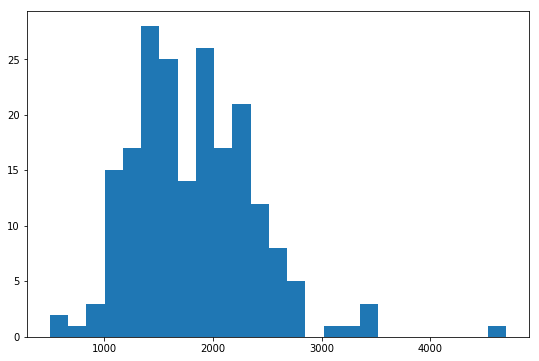

In [38]:
plt.hist(np.array(ssr).flatten(),bins = 25)
plt.show()

In [429]:
# a1 = int(np.where(np.linspace(v0,v1,len(counts)) == -0.25)[0])
# a2 = int(np.where(np.linspace(v0,v1,len(counts)) == 0.0)[0])

sum(counts[122:190])

39375.0

In [430]:
np.average([35392.0,35434.0,40313.0,39375])

37628.5

In [397]:
# np.linspace(v0,v1,len(counts))[122]

-0.25

In [453]:
kill_scanner()

In [325]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
task.StopTask()

# time.sleep(1)


# task.StartTask()
# task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
# task.StopTask()

In [68]:
_v_min = -0.75
_v_max = -0.5

init_scanner(v_min = _v_min,v_max = _v_max)

task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
task.StopTask()
time.sleep(1)
# task.StartTask()
# task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
# task.StopTask()


# NEED TO CREATE 2 RAMPS FOR FULL SCAN and FOR RESONANCE PHOTON COUNTING

upwards_ramp = laserscannerlogic._generate_ramp(_v_min, _v_max, laserscannerlogic._scan_speed)
downwards_ramp = laserscannerlogic._generate_ramp(_v_max, _v_min, laserscannerlogic._scan_speed)

laserscannerlogic._upwards_ramp = upwards_ramp
laserscannerlogic._downwards_ramp = downwards_ramp


counts = []

def singleshot():
    global counts
    
    resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
    laserscannerlogic._goto_during_scan(resonance)
    laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(resonance, resonance, laserscannerlogic._scan_speed)
    laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(resonance, resonance, laserscannerlogic._scan_speed)
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
    task.StopTask()
    time.sleep(1)
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
    task.StopTask()

    counts =  laserscannerlogic._do_next_one_line()
    print('counts single shot: ', counts)
    
def scan():
    global counts
    
    laserscannerlogic._upwards_ramp = upwards_ramp
    laserscannerlogic._downwards_ramp = downwards_ramp
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
    task.StopTask()
    time.sleep(1)
    
    while(True):
        task.StartTask()
        task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
        task.StopTask()

        counts =  laserscannerlogic._do_next_one_line()
        print('ratio: ',max(counts)/np.average(counts))
        if max(counts)<4*np.average(counts):
            task.StartTask()
            task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
            task.StopTask()
            time.sleep(1)
        else:
            break;



for i in range(20):
    scan()
    singleshot()
    
    
    
#     task.StartTask()
#     task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
#     task.StopTask()
    


#     GO TO RESONANCE
#     Apply green to repump
#     Apply red and count
    
#     if max(counts)<4*np.average(counts):
#         task.StartTask()
#         task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
#         task.StopTask()
#         time.sleep(1)

#     else: 
#         time.sleep(2)
# #         laserscannerlogic._goto_during_scan(np.linspace(v_min,v_max,len(counts))[np.argmax(counts)])
# #         laserscannerlogic._upwards_ramp

1
ratio:  1.3235955056179776
2
ratio:  1.4442595673876872
1
ratio:  5.66819625838334


Traceback (most recent call last):
  File "C:\Program Files (x86)\Qudi\logic\jupyterkernel\qzmqkernel.py", line 795, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-68-0387730b87e2>", line 73, in <module>
    singleshot()
  File "<ipython-input-68-0387730b87e2>", line 41, in singleshot
    counts =  laserscannerlogic._do_next_one_line()
  File "C:\Program Files (x86)\Qudi\logic\laser_scanner_logic_with_AWG.py", line 519, in _do_next_one_line
    self.scan_matrix2[self._scan_counter_down] = counts
ValueError: could not broadcast input array from shape (2) into shape (62)


In [61]:
laserscannerlogic._upwards_ramp

array([[-1.],
       [-1.]])

In [178]:
def first scan():    
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
    task.StopTask()
    return laserscannerlogic._do_next_one_line()

if max(count)<4*np.average(counts):
    first(scan)

    
    
    
# kill_scanner()
# v_min = np.linspace(v_min,v_max,len(counts))[np.argmax(counts)]
# v_max = np.linspace(v_min,v_max,len(counts))[np.argmax(counts)]
laserscannerlogic._goto_during_scan(np.linspace(v_min,v_max,len(counts))[np.argmax(counts)])
init_scanner(v_min,v_max)
counts = laserscannerlogic._do_next_one_line()
print(counts)









1
1
[ 416.66666667  666.66666667 1083.33333333 1083.33333333 1250.
 1083.33333333 1166.66666667  916.66666667 1083.33333333  750.
 1333.33333333 1083.33333333  750.         1416.66666667 1083.33333333
 1083.33333333  583.33333333 1000.         1000.         1000.
 1333.33333333  833.33333333  666.66666667  916.66666667  583.33333333
  916.66666667  916.66666667 1250.          583.33333333 1083.33333333
  833.33333333  916.66666667  583.33333333  666.66666667  666.66666667
 1166.66666667  833.33333333  250.         1166.66666667  500.
  583.33333333  750.          750.          250.          666.66666667
  416.66666667  666.66666667  583.33333333  500.          916.66666667
 1000.          666.66666667  500.         1000.          666.66666667
 1000.          750.          833.33333333 1000.         1166.66666667
 1000.         1166.66666667 1083.33333333  666.66666667  833.33333333
  916.66666667 1166.66666667  583.33333333  500.          916.66666667
  416.66666667  750.         1000.

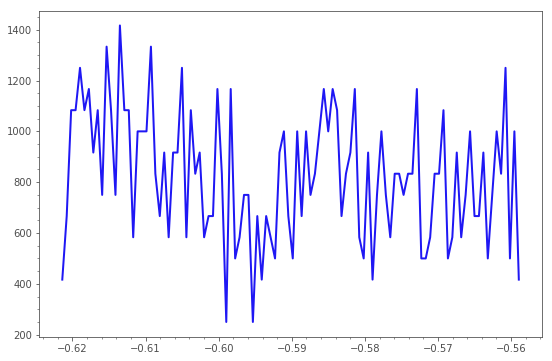

In [179]:
plt.plot(np.linspace(v_min,v_max,len(counts)),counts,'-')
plt.show()

In [121]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
task.StopTask()



In [122]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
task.StopTask()


In [170]:
try:
    laserscannerlogic.stop_scanning()
    laserscannerlogic._close_scanner()
except e:
    print('error')
    print(e)

In [157]:
laserscannerlogic._goto_during_scan(-0.64)

0

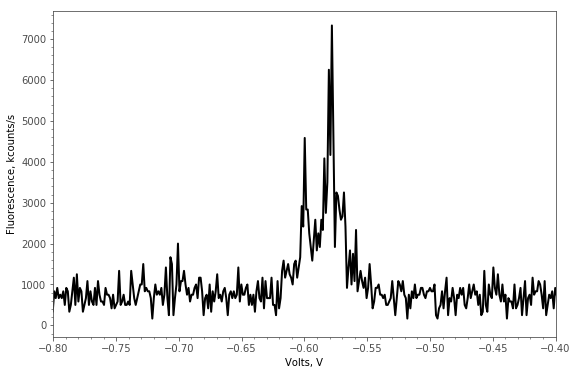

In [137]:
plt.plot(np.linspace(v_min,v_max,len(counts)),counts,'-',color = 'black')
plt.xlabel('Volts, V')
plt.ylabel('Fluorescence, kcounts/s')
plt.xlim(-0.8,-0.4)
plt.show()

# plt.savefig('ple.png')

In [218]:
%matplotlib inline

Traceback (most recent call last):
  File "C:\Program Files (x86)\Qudi\logic\jupyterkernel\qzmqkernel.py", line 605, in run_cell
    code_ast = compiler.ast_parse(cell, filename=cell_name)
  File "C:\Program Files (x86)\Qudi\logic\jupyterkernel\compilerop.py", line 101, in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  File "<ipython-input-218-1c7cef551a09>", line 1
    %matplotlib inline
    ^
SyntaxError: invalid syntax


5.436688881094352


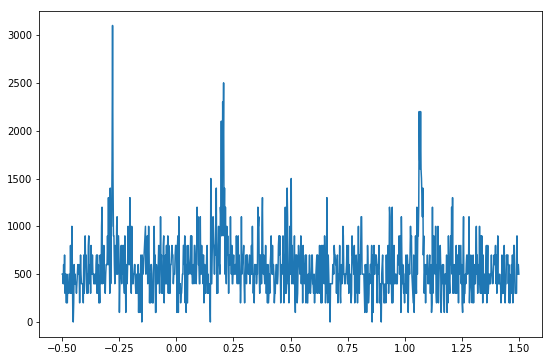

In [92]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
plt.show()
print(max(counts)/np.average(counts))

17.80395683453238


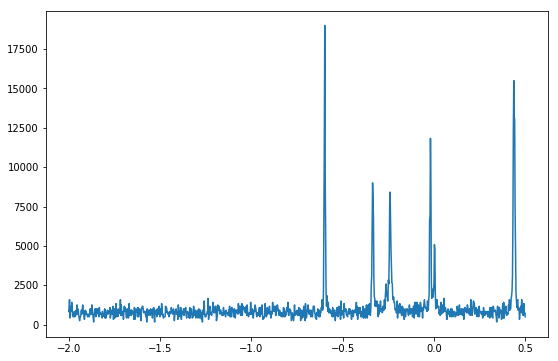

In [116]:
print(max(counts)/np.average(counts))
plt.plot(np.linspace(v_min,v_max,len(counts)),counts)
plt.show()

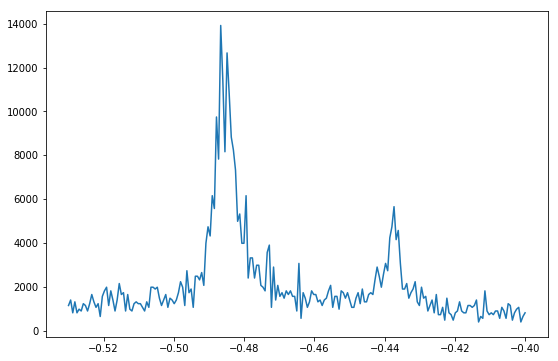

In [182]:
plt.plot(np.linspace(v_min,v_max,len(counts)),counts)
plt.show()

In [167]:
np.argmax(counts)
# max(counts)
np.linspace(v_min,v_max,len(counts))[np.argmax(counts)]

-0.6400240384615384

In [168]:
np.linspace(v_min,v_max,len(counts))[np.argmax(counts)]

-0.6400240384615384

In [60]:
v0= -1.0
v1= -1.0
init_scanner(v_min = v0,v_max = v1,speed= 0.1)


244